<a href="https://colab.research.google.com/github/KillerGlass/classifica-o-binaria-em-pytroch/blob/main/regressao_carros_usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Carregamento da bibliotecas

In [ ]:



import pandas as pd
import numpy as np
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
torch.__version__

'1.12.0+cu113'

#Etapa 2: Carregamento dos Dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)#garantir que os dados sempre sejam iguais 

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/autos.csv', encoding='ISO-8859-1')

In [ ]:
base.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
base.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [ ]:
base

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
dele = ['dateCrawled','lastSeen','nrOfPictures','dateCreated','postalCode','name', 'seller','offerType']
base = base.drop(dele, axis=1)

In [ ]:
base.shape

(371528, 12)

In [ ]:
base.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [ ]:
il = base.loc[base.price <= 10]
il.shape

(12118, 12)

In [ ]:
base = base.loc[ base.price < 350000]
base = base.loc[base.price > 10 ]

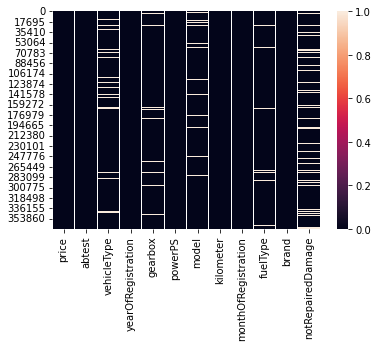

In [ ]:
sns.heatmap(base.isnull())##saber os valores nulos de um dataset, atraves dele faz escolhe aquelas colunas que terao
#as linhas com nulo substituido

In [ ]:
base.shape

(359291, 12)

In [ ]:
base.loc[pd.isnull(base['vehicleType'])]#vendo as linhas com numeros nulos para essa coluna

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [ ]:
base.shape

(359291, 12)

In [ ]:
base['vehicleType'].value_counts()#que mais se repete eh limosine

limousine     93614
kleinwagen    78014
kombi         65921
bus           29699
cabrio        22509
coupe         18386
suv           14477
andere         3125
Name: vehicleType, dtype: int64

In [ ]:
base['gearbox'].value_counts()#manuell

manuell      266547
automatik     75508
Name: gearbox, dtype: int64

In [ ]:
base['model'].value_counts()#golf

golf               28989
andere             25560
3er                19905
polo               12604
corsa              12149
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [ ]:
base['fuelType'].value_counts()#benzin


benzin     217582
diesel     106002
lpg          5222
cng           557
hybrid        271
andere        165
elektro       101
Name: fuelType, dtype: int64

In [ ]:
base['notRepairedDamage'].value_counts()#nein

nein    259301
ja       34004
Name: notRepairedDamage, dtype: int64

In [ ]:
valores = {'vehicleType': 'limousine', 'gearbox' : 'manuell', 'model': 'golf', 'fuelType': 'benzin','notRepairedDamage': 'nein'}

In [ ]:
base = base.fillna(value=valores)

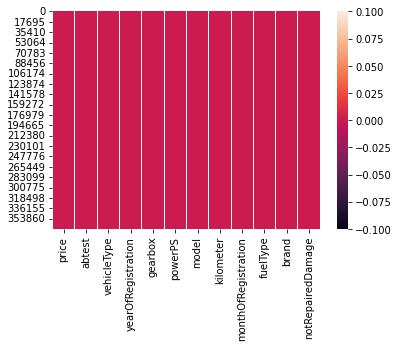

In [ ]:
sns.heatmap(base.isnull())

In [ ]:
prev = base.iloc[:, 1:13].values#seprando entre previsores e previsão, x e y
target = base.iloc[:, 0].values
prev.shape

(359291, 11)

In [ ]:
from sklearn.preprocessing import OneHotEncoder#converter os dados categoricos
from sklearn.compose import ColumnTransformer

In [ ]:
oneHot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,3,5,8,9,10])],remainder='passthrough')

In [ ]:
prev = oneHot.fit_transform(prev).toarray()

In [ ]:
prev[0]

array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [ ]:
type(prev)

numpy.ndarray

In [ ]:
prev = torch.tensor(prev, dtype=torch.float)
target = torch.tensor(target, dtype=torch.float)

In [ ]:
prev.shape

torch.Size([359291, 316])

# Etapa 3: Construção do modelo

In [ ]:
#316 -> atributos
#(entradas + saidas) / 2 = (316 + 1)/2 = 158
# camadas 158 -> 158 -> 1
#n vai ser necessario uma função de uma ativação no final, por ser uma regressão
regressor = nn.Sequential(nn.Linear(316,158),
                          nn.ReLU(),
                          nn.Linear(158,158),
                          nn.ReLU(),
                          nn.Linear(158,1))

NameError: ignored

In [ ]:
criterion = nn.L1Loss()
optimizer = optim.Adam(regressor.parameters())

In [ ]:
dataset = torch.utils.data.TensorDataset(prev, target)
train = torch.utils.data.DataLoader(dataset, batch_size=300, shuffle=True)

#Treinamento do Modelo

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

NameError: ignored

In [ ]:
regressor.to(device)

NameError: ignored

In [ ]:
for epoch in range(100):

  running_loss = 0.
  running_mother = 0.

  for i, data in enumerate(train):

    inputs, labels = data
    inputs , labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()#zerando o gradiente

    outputs = regressor.forward(inputs)

    mother = F.l1_loss(outputs, labels).item()

    running_mother +=mother

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    print('\r Epoca {:3d} - Loop {:3d} de {:3d}: perda {:06.2f} - Mother {:06.2f}'.format(epoch+1, i+1, len(target)//300,loss, mother))

  print('\r Epoca {:3d} Finalizada - perda {:06.2f} - Mother {:06.2f}'.format(epoch+1, running_loss/len(train), running_mother/len(train)))



#Avaliacao do modelo

In [ ]:
regressor.eval()

NameError: ignored

In [ ]:
previsores  = regressor.forward(prev.to(device))

NameError: ignored

In [ ]:
target.mean()

In [ ]:
previsores.mean()

In [ ]:
target.mean() - previsores.mean()